In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_diabetes

In [49]:
diabetes = load_diabetes()

In [50]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [51]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)  
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [52]:
df['target'] = diabetes.target
df['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [53]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [54]:
X = df.drop(columns='target')

In [55]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [56]:
y = df['target']

In [57]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # random_state is the seed value, it is used to reproduce the same results every time

### Normalization/Standardization is important for Ridge and Lasso Regression

In [59]:
scalar = StandardScaler()

In [60]:
X_train_scaled = scalar.fit_transform(X_train)  # fit_transform calculates the mean and std and then scales the data

In [61]:
X_test_scaled = scalar.transform(X_test)    # transform uses the mean and std calculated from the training data to scale the test data, which is the correct way to scale the test data

In [62]:
# ridge model
ridge_model = Ridge()

In [63]:
# 
lasso_model = Lasso()

In [64]:
ridge_model.fit(X_train_scaled, y_train)   # fit is used to train the model

Ridge()

In [65]:
lasso_model.fit(X_train_scaled, y_train)   # fit is used to train the model

Lasso()

In [66]:
ridge_model.predict(X_test_scaled)   # predict is used to make predictions

array([139.86277405, 179.9582406 , 135.71687469, 292.11578228,
       123.18931464,  92.63420961, 257.85540931, 182.98437571,
        88.57110276, 109.34130188,  94.44005222, 166.79559349,
        56.34471823, 206.28537014,  99.83697447, 131.14352119,
       220.13422127, 249.66324991, 196.24491272, 217.48836765,
       207.27026897,  88.62662434,  71.00067256, 188.77371926,
       155.27179344, 160.11509377, 188.68359243, 179.4462606 ,
        48.58194512, 109.46862532, 176.30864771,  87.81175183,
       132.57482949, 183.48671555, 173.64887924, 190.57967229,
       123.89852066, 119.22466026, 147.3190418 ,  59.64849436,
        72.53769889, 107.79400092, 164.47289681, 153.51402972,
       172.19580463,  62.65517635,  73.5923177 , 112.86223345,
        53.52690481, 165.85907297, 153.72729198,  63.69903686,
       106.37934882, 108.94605495, 174.12346145, 156.07183591,
        94.49282843, 209.90083637, 119.67133314,  75.31549064,
       187.08319266, 205.38638319, 140.93273277, 105.55

In [67]:
lasso_model.predict(X_test_scaled)    # predict is used to make predictions

array([144.57023028, 178.81110506, 146.73567504, 280.88957847,
       124.03909694,  97.50249878, 259.67789975, 194.71873825,
        88.3919044 , 118.01101696,  99.19043541, 159.27292039,
        65.55308084, 205.14809807, 101.74721056, 133.22589431,
       222.18296422, 242.78029407, 194.42813441, 213.25114497,
       208.35770698,  90.11574615,  71.05984547, 190.39472477,
       158.87131914, 162.15483057, 190.61003589, 173.36685377,
        51.82544349, 115.67752438, 178.68551235,  92.88560262,
       136.60336668, 179.57402381, 171.21011118, 200.80798743,
       125.65645075, 121.91151049, 145.17830531,  60.59819277,
        72.85152207, 108.69104169, 161.10624053, 144.39331843,
       174.05133453,  67.30989032,  80.11398941, 102.82187412,
        57.69725661, 161.83449653, 156.57888261,  69.9406521 ,
       111.54468605, 106.8109581 , 171.96116585, 160.43315235,
        95.13421852, 207.88273395, 120.57955489,  67.88452473,
       184.96126993, 201.72008257, 144.70280481, 107.34

In [68]:
mean_squared_error(y_test, ridge_model.predict(X_test_scaled))   #actual values and predicted values

2892.014565750172

In [69]:
mean_squared_error(y_test, lasso_model.predict(X_test_scaled))

2824.568094049959

In [70]:
r2_score(y_test, ridge_model.predict(X_test_scaled))

0.45414652070698236

In [71]:
r2_score(y_test, lasso_model.predict(X_test_scaled))

0.46687670944102466

In [72]:
import pickle

In [73]:
with open('diabetes_ridge_final_model.pkl', 'wb') as f:
    pickle.dump((ridge_model, scalar), f)

In [74]:
with open('diabetes_lasso_final_model.pkl', 'wb') as f:
    pickle.dump((lasso_model, scalar), f)

# Polynomial Regression

In [96]:
data = pd.read_csv("Ice-cream-selling.csv")

In [97]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


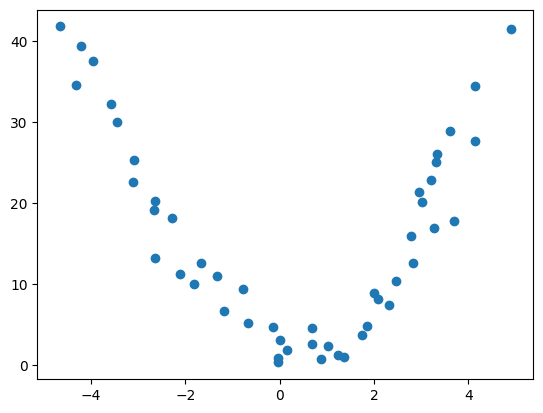

In [98]:
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'])

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [101]:
X = data[['Temperature (°C)']]  # independent variables should always be a 2D array

In [102]:
y = data['Ice Cream Sales (units)']

In [103]:
poly_model = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
poly_model1 = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
poly_model2 = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
poly_model3 = make_pipeline(PolynomialFeatures(degree = 16), LinearRegression())
poly_model4 = make_pipeline(PolynomialFeatures(degree = 13), LinearRegression())

In [104]:
poly_model.fit(X, y)
poly_model1.fit(X, y)
poly_model2.fit(X, y)
poly_model3.fit(X, y)
poly_model4.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

In [105]:
y_pred = poly_model.predict(X)

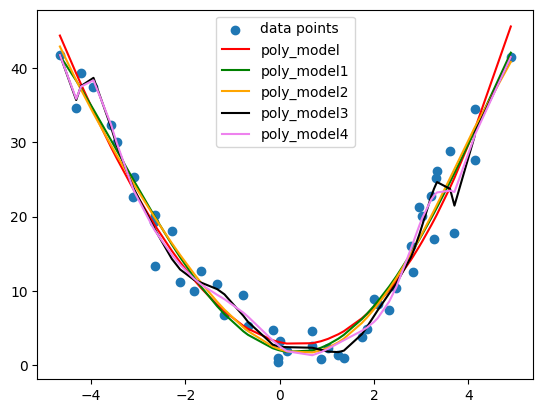

In [84]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.plot(X, poly_model1.predict(X), color='green')
plt.plot(X, poly_model2.predict(X), color='orange')
plt.plot(X, poly_model3.predict(X), color='black')
plt.plot(X, poly_model4.predict(X), color='violet')
plt.legend(['data points', 'poly_model', 'poly_model1', 'poly_model2', 'poly_model3', 'poly_model4'])

In [85]:
r2_score(y, poly_model.predict(X))

0.9367011897445384

In [86]:
r2_score(y, poly_model1.predict(X))

0.9438453407370606

In [87]:
r2_score(y, poly_model2.predict(X))

0.945283262189464

In [88]:
r2_score(y, poly_model3.predict(X))

0.9652908939430089

In [89]:
r2_score(y, poly_model3.predict(X))

0.9652908939430089

In [90]:
mean_squared_error(y, poly_model.predict(X))

9.327243445671256

In [91]:
mean_squared_error(y, poly_model1.predict(X))

8.274534314947283

In [92]:
mean_squared_error(y, poly_model2.predict(X))

8.06265286902133

In [93]:
mean_squared_error(y, poly_model3.predict(X))

5.114476570232934

In [94]:
mean_squared_error(y, poly_model4.predict(X))

5.649246506065484

In [95]:
# the best model is poly_model2, because it has the highest r2_score and the lowest mean_squared_error
# whereas poly_model3 is overfitting the data
with open('ice_cream_sales_final_model.pkl', 'wb') as f:
    pickle.dump(poly_model2, f)